<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_PyTorchTraining/blob/main/IG_ANN_UsingPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [37]:
data, target = make_circles(n_samples=1000, noise=0.03, random_state=10)

In [38]:
data[:5]

array([[-0.31031434, -0.68316883],
       [ 0.65484283, -0.40810234],
       [ 0.72067081,  0.42182061],
       [-0.54407753,  0.81163728],
       [-0.81208571, -0.14351782]])

In [39]:
target[:5]

array([1, 1, 1, 0, 1])

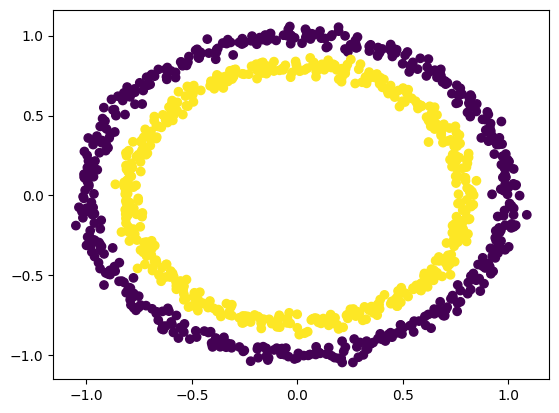

In [40]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.show()

In [42]:
# convert numpy array into tensor object
X = torch.from_numpy(data).type(torch.float)
y = torch.from_numpy(target).type(torch.float)

In [44]:
# test size is 0.25 that means 25% data is reserved for testing purpose
# we apply deep learning on training data and then test our model on testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [45]:
X.shape

torch.Size([1000, 2])

In [46]:
x_train.shape

torch.Size([750, 2])

In [47]:
# Building Model

In [48]:
# setup GPU for deep learning model
device = "cuda" if torch.cuda.is_available() else "cpu"

In [49]:
device

'cpu'